# Assiciation Rules

In [15]:
#!pip install mlxtend

data source: https://www.kaggle.com/shazadudwadia/supermarket

In [16]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
#קובץ מכיל רשימה של קניות 
path= r"C:\Users\Leon\Desktop\LeonidPython\GroceryStoreDataSet.csv"
df = pd.read_csv(path, names = ['products'], sep = ',')
#נותן כותרת לעמודה
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [18]:
df.shape

(20, 1)

In [19]:
# עושה list של list
data = list(df["products"].apply(lambda x:x.split(",") ))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [20]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,0,True,0,0,0,0,0,True,0,0
1,True,0,True,0,0,True,0,0,True,0,0
2,0,True,True,0,0,0,0,0,0,0,True
3,0,0,True,0,0,0,True,True,True,0,0
4,True,0,0,0,0,0,0,True,0,0,True
5,0,True,True,0,0,0,0,0,0,0,True
6,0,0,0,0,0,True,0,True,0,0,True
7,True,0,True,0,0,0,0,True,0,0,True
8,0,0,True,0,0,0,True,True,0,0,True
9,0,0,True,0,0,0,0,0,True,0,0


In [21]:
df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)
df

Processing 42 combinations | Sampling itemset size 3


,support,itemsets
0,0.35,(BISCUIT)
1,0.2,(BOURNVITA)
2,0.65,(BREAD)
3,0.4,(COFFEE)
4,0.3,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.3,(SUGER)
8,0.35,(TEA)
9,0.2,"(BISCUIT, BREAD)"


In [31]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.8)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.8,1.230769,0.0375,1.75
1,(MAGGI),(TEA),0.25,0.35,0.2,0.8,2.285714,0.1125,3.25


## Decision Tree Classification: Iris
<img src="IrisPhoto.png"></src>


In [51]:
#!pip install pydotplus

Before running, install the following packages: 
- GraphViz software https://graphviz.org/_pages/Download/Download_windows.html
- Add GraphViz to windows path:
    - In "System Properties", pick "Advanced" tab. 
    - Environment Variables->System Variables-> Path -> Edit -> New
    - Add: c:\Program Files (x86)\Graphviz2.38\bin\
- In Anaconda prompt, install:
    - pip install graphviz
    - pip install pydotplus
- Restart Jupiter.  

### Load data

In [52]:
import graphviz
import pydotplus
import pandas as pd
from sklearn.datasets import load_iris
iris_data = load_iris()
# transform to pandas
iris = pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])
iris['class'] = iris_data['target_names'][iris_data['target']]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
X=iris[iris_data.feature_names]
y=iris['class']

## Train decision tree

In [54]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
cross_val_score(clf,X,y, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

## Generate Graphical Representation of the Tree 

In [55]:
#!pip install graphviz
#!pip install pydotplus

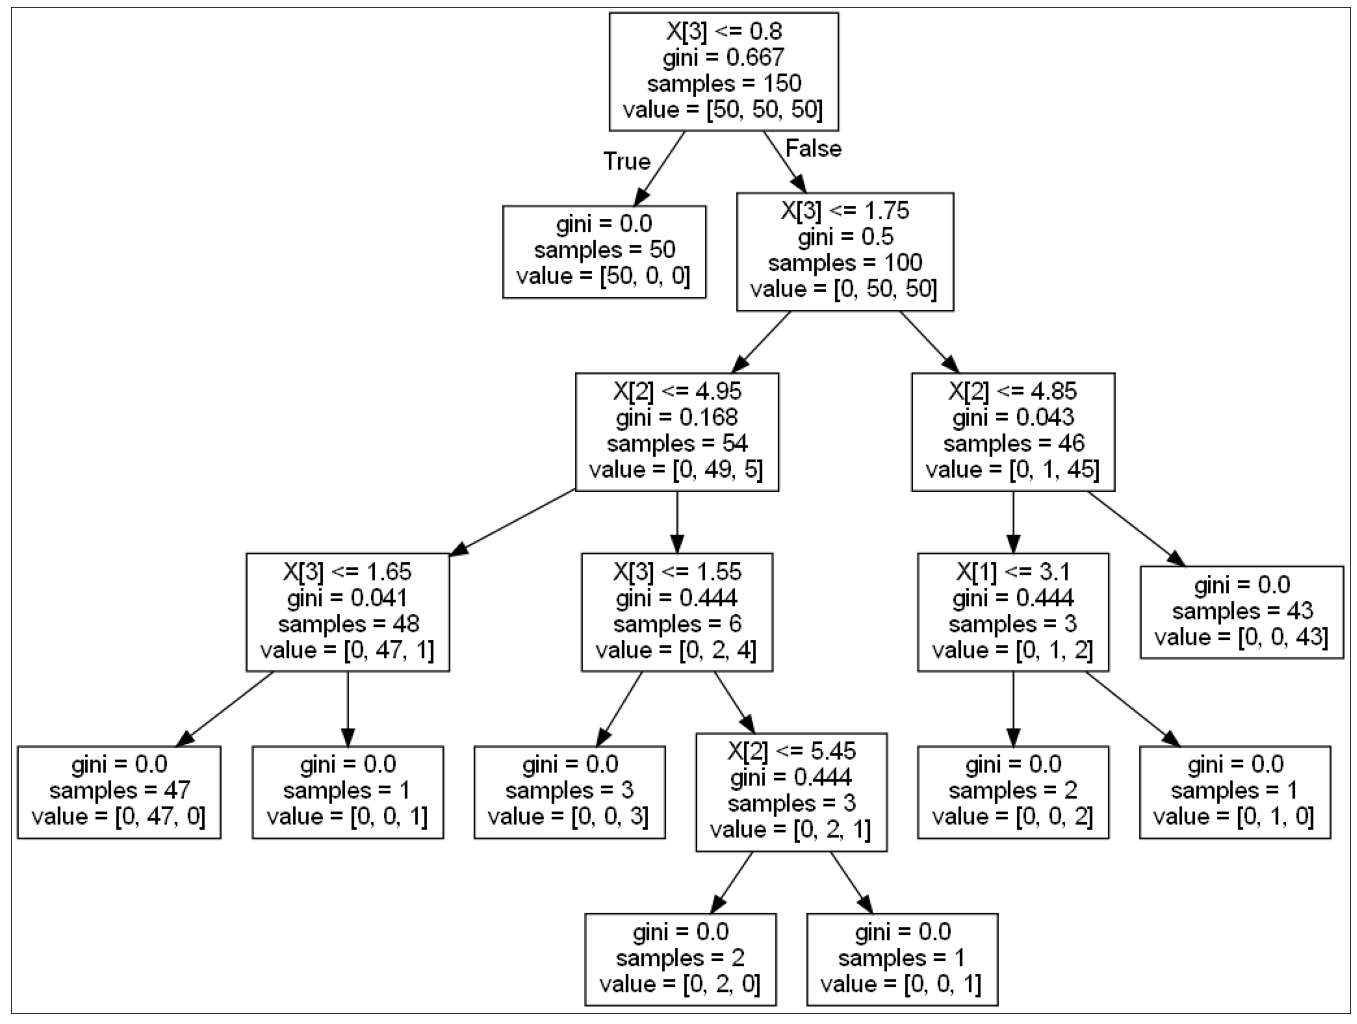

In [56]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus # generates graphs. >>pip install pydotplus + install GraphViz + conda install graphviz
# install graphviz  from: https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi 
# Add c:\Program Files (x86)\Graphviz2.38\bin\ to system path

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('iris.png');
fig, ax = plt.subplots(figsize=(24, 24))
ax.imshow(plt.imread('iris.png'));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

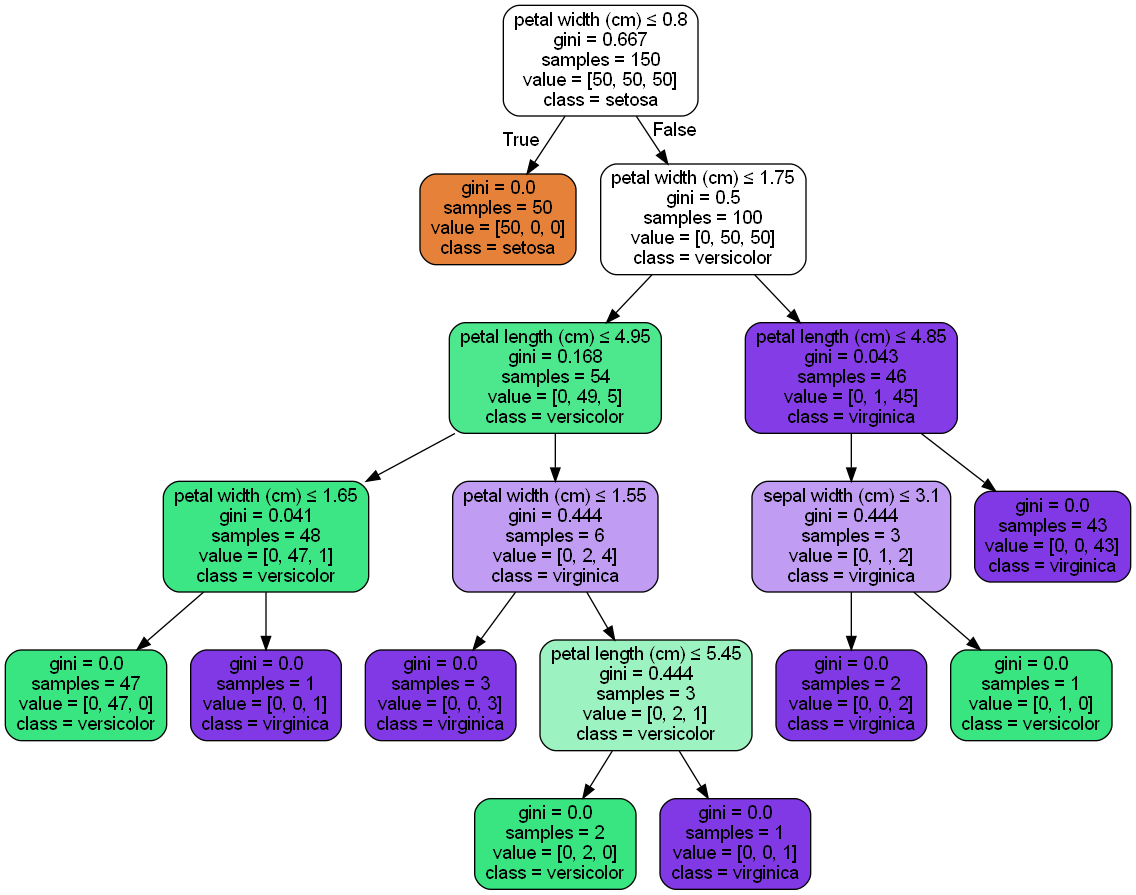

In [57]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris_data.feature_names,  
                         class_names=iris_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  